### ML

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
winelist = pd.read_csv('winelistall.csv')

In [107]:
winelist.quality_label.value_counts()

quality_label
medium    3179
low       1988
high       153
Name: count, dtype: int64

## Encoding

In [108]:
winelist.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,red



[**Encoding**](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/) is the process of converting a categorical value into a numerical value. Machine learning algorithms can only process numerical data, and depending on what your category is communicating, there are a few ways you can transform it to optimize how it is processed. 

## Label / Ordinal Encoding

**Label and ordinal encoding** will replace any categorical value with an integer. Label encoding works best for **boolean** or 2-option categories, but will also be necessary for your **target classes**. If your categories can also be considered "ranked", you should use ordinal encoding to preserve the order of the labels. There are many ways you can achieve this, the most practical is probably to use [`LabelEncoder()`](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) or [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) from Scikit Learn.

[Here](https://www.geeksforgeeks.org/label-encoding-across-multiple-columns-in-scikit-learn/) is a good article demonstrating various multi-column approaches. 

<!-- Make sure to assign the dtype for the encoded column as [Categorical dtype](https://pandas.pydata.org/docs/user_guide/categorical.html#categoricaldtype).  -->

In [109]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder(categories=[["red", "white"]], dtype=int) # this is how you can define the label order
winelist['winetype'] = oe.fit_transform(winelist[['winetype']])

#le = LabelEncoder()
#dfm['ExerciseAngina'] = le.fit_transform(dfm['ExerciseAngina'])

#dfm[['Sex', 'ExerciseAngina']].head()


In [110]:
winelist

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,1


In [111]:
winelist.quality_label.value_counts()

quality_label
medium    3179
low       1988
high       153
Name: count, dtype: int64

In [112]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


oe = OrdinalEncoder(categories=[["low", "medium","high"]], dtype=int) # this is how you can define the label order
winelist['quality_label'] = oe.fit_transform(winelist[['quality_label']])




#le = LabelEncoder()
#winelist['quality_label'] = le.fit_transform(winelist['quality_label'])

#winelist[['quality_label']].head()

In [113]:
#mapping = {'low':0,'medium':1, 'high':3}
#https://www.youtube.com/watch?v=YuzLkF7Ymf4&t=295s

In [114]:
winelist.head(15)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,winetype
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0
5,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,0
6,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,0
7,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,0
8,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,0
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0,0


In [115]:
winelist.to_csv('wine_enocoded.csv', index=False)

In [116]:
winelist.head(30)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,winetype
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0
5,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,0
6,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,0
7,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,0
8,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,0
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0,0


In [117]:
winelist.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_label             int32
winetype                  int32
dtype: object

In [118]:
print(winelist)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

## SPLIT DATA

In [119]:
from sklearn.model_selection import train_test_split

X  = winelist.drop(columns=['quality','quality_label'])
y = winelist['quality_label']

print("original:", winelist.shape, "\nX:", X.shape, "\ny:", y.shape)



original: (5320, 14) 
X: (5320, 12) 
y: (5320,)


In [120]:
X.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0


In [121]:
y.head(4)

0    0
1    0
2    0
3    1
Name: quality_label, dtype: int32

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train, X_test)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
2629            7.0             0.170         0.74           12.80      0.045   
511            10.2             0.290         0.49            2.60      0.059   
62              6.6             0.705         0.07            1.60      0.076   
3128            6.0             0.280         0.22           12.15      0.048   
4233            7.7             0.380         0.23           10.80      0.030   
...             ...               ...          ...             ...        ...   
3092            6.6             0.270         0.29            5.30      0.045   
3772            7.7             0.250         0.30            7.80      0.038   
5191            7.3             0.360         0.62            7.10      0.033   
5226            6.0             0.320         0.30            7.30      0.174   
860             8.9             0.320         0.31            2.00      0.088   

      free_sulfur_dioxide  

## Normalisation

In [123]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [124]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state=40)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [125]:
preds = RF_clf.predict(X_test)
preds

array([1, 1, 1, ..., 1, 0, 1])

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
acc = accuracy_score(y_test, preds)
acc

0.7471804511278195

In [128]:
#from sklearn.ensemb

In [129]:
y_train.head()

2629    2
511     1
62      0
3128    0
4233    1
Name: quality_label, dtype: int32

In [130]:
#print("Confusion matrix:")
#print(confusion_matrix(y_test, pred_lr))

In [131]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)
cm

array([[258, 132,   0],
       [111, 537,   0],
       [  0,  26,   0]], dtype=int64)

Text(0.5, 25.722222222222214, 'Predicted Labels')

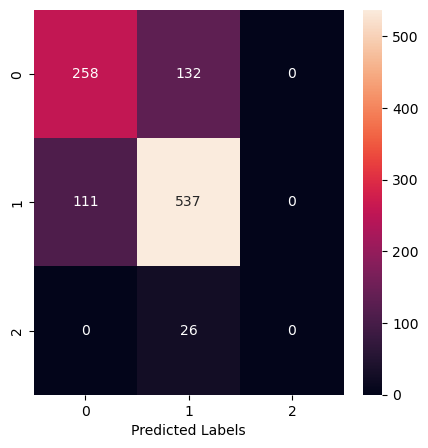

In [132]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Labels")

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [134]:
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc}")

Accuracy: 0.7471804511278195


In [135]:
precision = precision_score(y_test, preds, average='weighted')  # Für Mehrklassen: 'weighted'
print(f"Precision: {precision}")


Precision: 0.7268494538680443


c:\Users\cumdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [136]:
recall = recall_score(y_test, preds, average='weighted')  # Für Mehrklassen: 'weighted'
print(f"Recall: {recall}")


Recall: 0.7471804511278195


In [137]:
f1 = f1_score(y_test, preds, average='weighted')  # Für Mehrklassen: 'weighted'
print(f"F1 Score: {f1}")

F1 Score: 0.7362268225341607


In [138]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       390
           1       0.77      0.83      0.80       648
           2       0.00      0.00      0.00        26

    accuracy                           0.75      1064
   macro avg       0.49      0.50      0.49      1064
weighted avg       0.73      0.75      0.74      1064



c:\Users\cumdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cumdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cumdi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## NAIVE BAYES

Video: https://www.youtube.com/watch?v=T6OxPncD7_w&t=313s

In [139]:
wineclean = pd.read_csv("wine_enocoded.csv")
wineclean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


split Data

In [140]:
from sklearn.model_selection import train_test_split

X  = winelist.drop(columns=['quality','quality_label'])
y = winelist['quality_label']

print("original:", winelist.shape, "\nX:", X.shape, "\ny:", y.shape)


original: (5320, 14) 
X: (5320, 12) 
y: (5320,)


In [141]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=33)

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
gnb = GaussianNB()

In [144]:
gnb.fit(X_train, y_train)

GaussianNB()

In [145]:
y_pred = gnb.predict(X_test)

In [146]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58       398
           1       0.69      0.65      0.67       638
           2       0.12      0.43      0.19        28

    accuracy                           0.61      1064
   macro avg       0.47      0.54      0.48      1064
weighted avg       0.64      0.61      0.62      1064



In [148]:
acc = accuracy_score(y_test, y_pred )
print(f"Accuracy: {acc}")

Accuracy: 0.6071428571428571


## Gradient Boosting

Video: https://www.youtube.com/watch?v=E2mCaIZNE2g

In [149]:
wineclean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,1
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [150]:
from sklearn.model_selection import train_test_split

X  = winelist.drop(columns=['quality','quality_label'])
y = winelist['quality_label']

print("original:", winelist.shape, "\nX:", X.shape, "\ny:", y.shape)


original: (5320, 14) 
X: (5320, 12) 
y: (5320,)


In [151]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=33)

In [152]:
from sklearn.model_selection import cross_val_score

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

In [154]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)


GradientBoostingClassifier()

In [155]:
cross_val_score(gbr,X_train,y_train,cv=3,n_jobs=-1).mean()

0.7333186889063165

In [162]:
param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.1,1.0],
    'max_depth':[5,9]
    
    }

In [163]:
from sklearn.model_selection import GridSearchCV

gbr2 = GridSearchCV(gbr, param_grid, cv=3,n_jobs=-1)

In [164]:
gbr2.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1.0], 'max_depth': [5, 9],
                         'n_estimators': [50, 100]})

In [165]:
cross_val_score(gbr2,X_train,y_train,cv=3,n_jobs=-1).mean()

KeyboardInterrupt: 

In [ ]:
gbr2.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}